In [ ]:
#-----------------IMPORTS-----------------#
import pandas as pd #we separately import pandas to read data from a csv file
import numpy as np #we import numpy to work with arrays

#-----------------DATA-----------------#
#1min EURGBP data
url = "https://onedrive.live.com/download?resid=4E16D53638D067A9%21339325&authkey=!AHOCBUokDjDiCc8"

#1 second EURGBP data
#url = "https://onedrive.live.com/download?resid=4E16D53638D067A9%21339754&authkey=!ACcJZZPFqOmKVUY"

data_downloaded = pd.read_csv(url, parse_dates = True, index_col=0) #it's a time series data, so I'm setting the index to be the first column
close = data_downloaded["close"].to_numpy() #We transform the close prices into a numpy array

### Representation of block bootstrapping:
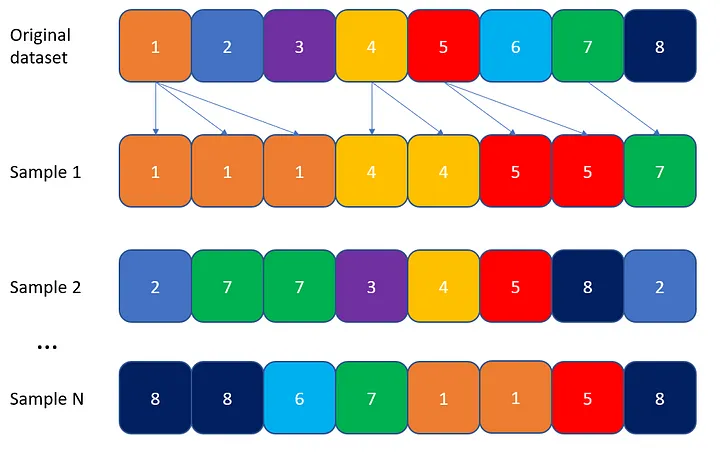

In [ ]:
#### Combine everything into a function
from numba import njit

@njit(fastmath=True)
def BlockBootstrapping(close_data, num_blocks=100, num_simulations=100):
    
    #We define the the variables:
    #---------------------------------#
    returns = np.zeros(len(close_data))
    for i in range(1,len(close_data)):
        returns[i] = (close_data[i] - close_data[i-1]) / close_data[i-1]
    

    returns_segments = np.array_split(returns, num_blocks)
    returns_segments_matrix = np.zeros((num_blocks, len(returns_segments[0])))
    for i in range(len(returns_segments)):
        returns_segments_matrix[i] = returns_segments[i]




    shuffled_returns_matrix = np.zeros((num_blocks, num_simulations))
    
    
    for i in range(num_simulations):
        # Generate a permutation of indices
        permuted_indices = np.random.permutation(num_blocks)
        # Apply the permutation to the rows of the matrix
        shuffled_segments = returns_segments_matrix[permuted_indices]
        # Concatenate the shuffled rows into a single column
        shuffled_returns = np.concatenate(shuffled_segments)
        shuffled_returns_matrix[:, i] = shuffled_returns[:num_blocks]  # Ensure the correct shape
    

    

    
    #---------------------------------#

    
    return shuffled_returns_matrix

shuffled_returns_matrix = BlockBootstrapping(close_data = close, num_blocks=10, num_simulations=10)